# Loan Prediction

## Introduction

### Business Objective

A financial institution wants us to help them identify customers who have a lesser chance of defaulting on the loan.

The company management has asked the data science team to build a predictive model to identify who would be a good customer. Furthermore, they want the team to come up with questions to ask the client, based on the model, when they are applying for loan.

### Data Understanding

The dataset resembles a real-world dataset and has many of the same challenges. It has:
Missing values
Spelling differences
Punctuation format
Duplicates rows

### Data Preparation

Split your data into training and testing
Start with Exploratory data analysis
Data cleaning
Handling the missing values
Transform categorical data into numeric
Feature Engineering (such as credit utilization)
The goal is to clean the dataset and get it ready for the Algorithms

### Modeling

### Algorithm Selection

Depending on the question at hand you can decide which algorithm
to choose

### Classification Question

Pick a classification algorithm
Regression based
Tree based
Distance based
Probability based
Model Evaluation
Evaluation criteria

### Modeling:

Pick an algorithm
Train the algorithm using training data
Evaluate the trained model
Use the trained model to predict who is a good customer
on test data
Come up with questions to ask the customer when they
apply for a loan

### Dictionary

The dataset consists of the following fields:
• Loan ID: A unique Identifier for the loan information.
<br>
• Customer ID: A unique identifier for the customer. Customers may have more than one loan.
<br>
• Loan Status: A categorical variable indicating if the loan was paid back or defaulted.
<br>
• Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted.
<br>
• Term: A categorical variable indicating if it is a short term or long term loan.
<br>
• Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history.
<br>
• Years in current job: A categorical variable indicating how many years the customer has been in their current job.
<br>
• Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage
<br>
• Annual Income: The customer's annual income
<br>
• Purpose: A description of the purpose of the loan.
<br>
• Monthly Debt: The customer's monthly payment for their existing loans
<br>
• Years of Credit History: The years since the first entry in the customer’s credit history
<br>
• Months since last delinquent: Months since the last loan delinquent payment
<br>
• Number of Open Accounts: The total number of open credit cards
<br>
• Number of Credit Problems: The number of credit problems in the customer records.
<br>
• Current Credit Balance: The current total debt for the customer
<br>
• Maximum Open Credit: The maximum credit limit for all credit sources.
<br>
• Bankruptcies: The number of bankruptcies
<br>
• Tax Liens: The number of tax liens.

## Analyzing the data

### Load the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('LoansTrainingSet.csv')
df.head()

/var/folders/qp/9j67xhhx3z1_9y5zm_dghclw0000gn/T/ipykernel_32262/3709207896.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('LoansTrainingSet.csv')


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


### Get rid of the duplicates

In [3]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

### EDA#

In [4]:
df.sample(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
215502,d66f55b1-df4e-4ae3-b964-a2ea0e117157,07529e95-d3bf-4908-916f-468b69571d29,Fully Paid,15006,Short Term,714.0,10+ years,Home Mortgage,80032.0,Debt Consolidation,$392.16,18.0,61.0,6,0,5997,12215,0.0,0.0
142819,8e023fb3-68a8-4f9f-a9fe-413437eceb3d,2b7da62e-805e-4fc1-8bdc-140d866e393f,Fully Paid,99999999,Short Term,737.0,1 year,Rent,41891.0,Debt Consolidation,$715.98,15.0,59.0,7,0,6912,18937,0.0,0.0
187378,ba6ae4af-71df-4d43-a8ab-ae103882bd3a,4b4168b5-9de1-4a77-9611-1896a521d464,Charged Off,18155,Short Term,740.0,10+ years,Rent,102877.0,Buy House,$968.76,22.3,NaN,8,0,33113,49720,0.0,0.0
189770,bcb83e60-13f5-40be-aa65-0bf9b6b74a9c,2c6e6029-109d-4f7c-86d2-4b8b52d112dc,Fully Paid,7583,Short Term,NaN,NaN,Home Mortgage,NaN,Debt Consolidation,"$1,005.54",34.6,19.0,13,0,10731,30924,0.0,0.0
53996,35bc3259-f6a1-44b1-9521-0f4b860e7b10,8f5c8669-9ec3-4219-8feb-3a24299507f6,Fully Paid,11944,Short Term,740.0,2 years,Home Mortgage,81615.0,Debt Consolidation,"$1,047.38",17.6,NaN,8,0,6496,14247,0.0,0.0
125323,7c933655-f465-441f-8aab-bafe2c64471b,3c3fc4df-50f5-4e6f-bee9-2d515ad857e3,Fully Paid,9495,Short Term,742.0,10+ years,Home Mortgage,71215.0,Debt Consolidation,$902.06,23.4,50.0,15,0,25231,63078,0.0,0.0
169300,a8539cc1-63d7-4e2e-bddb-4dd1a074182c,e76277af-6681-4516-9deb-9871fbb380cd,Fully Paid,1019,Short Term,NaN,< 1 year,Rent,NaN,Other,$17.33,11.8,NaN,4,0,577,6709,0.0,0.0
40696,28904b8e-98a6-4dac-8ae0-b1d1dfd47532,7a0d161e-c43e-4ab1-817b-cb403368a833,Fully Paid,8674,Short Term,738.0,1 year,Rent,107153.0,Debt Consolidation,$734.89,8.5,43.0,9,0,10136,17034,0.0,0.0
2205,0243d3cf-8e38-4641-8d32-fc239b6a6ff5,998bcc12-5d2e-4d17-8d9f-346438d6b3bf,Fully Paid,34307,Long Term,721.0,10+ years,Home Mortgage,147030.0,Debt Consolidation,"$1,014.51",16.0,22.0,8,0,33864,44972,0.0,0.0
237985,ecd38bde-7c5a-450d-b77c-ca3ee969704a,1c2fc8c0-e3de-46d7-aeae-3774376c2b93,Charged Off,12763,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,$599.74,30.5,NaN,10,0,4958,5355,0.0,0.0


In [5]:
df.shape

(240374, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240374 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       240374 non-null  object 
 1   Customer ID                   240374 non-null  object 
 2   Loan Status                   240374 non-null  object 
 3   Current Loan Amount           240374 non-null  int64  
 4   Term                          240374 non-null  object 
 5   Credit Score                  181028 non-null  float64
 6   Years in current job          229930 non-null  object 
 7   Home Ownership                240374 non-null  object 
 8   Annual Income                 181028 non-null  float64
 9   Purpose                       240374 non-null  object 
 10  Monthly Debt                  240374 non-null  object 
 11  Years of Credit History       240374 non-null  float64
 12  Months since last delinquent  108947 non-null  fl

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,240374.0,1.465988e+07,3.535384e+07,505.0,8300.25,14394.0,24566.0,99999999.0
Credit Score,181028.0,1.236274e+03,1.737766e+03,585.0,715.00,734.0,744.0,7510.0
Annual Income,181028.0,7.240027e+04,5.646808e+04,0.0,44555.00,61505.0,87057.0,8713547.0
Years of Credit History,240374.0,1.831039e+01,7.067637e+00,3.4,13.50,17.0,21.8,70.5
Months since last delinquent,108947.0,3.493919e+01,2.184412e+01,0.0,16.00,32.0,51.0,176.0
Number of Open Accounts,240374.0,1.109735e+01,4.976340e+00,0.0,8.00,10.0,14.0,76.0
Number of Credit Problems,240374.0,1.559778e-01,4.594027e-01,0.0,0.00,0.0,0.0,11.0
Current Credit Balance,240374.0,1.541692e+04,1.979132e+04,0.0,5962.00,11057.0,19316.0,1731412.0
Bankruptcies,239882.0,1.101792e-01,3.361759e-01,0.0,0.00,0.0,0.0,7.0
Tax Liens,240351.0,2.695225e-02,2.442720e-01,0.0,0.00,0.0,0.0,11.0


In [8]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     59346
Years in current job             10444
Home Ownership                       0
Annual Income                    59346
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    131427
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       492
Tax Liens                           23
dtype: int64

Lots of empty data here.

In [9]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

#### Visualizations

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings('ignore')

##### Correlation

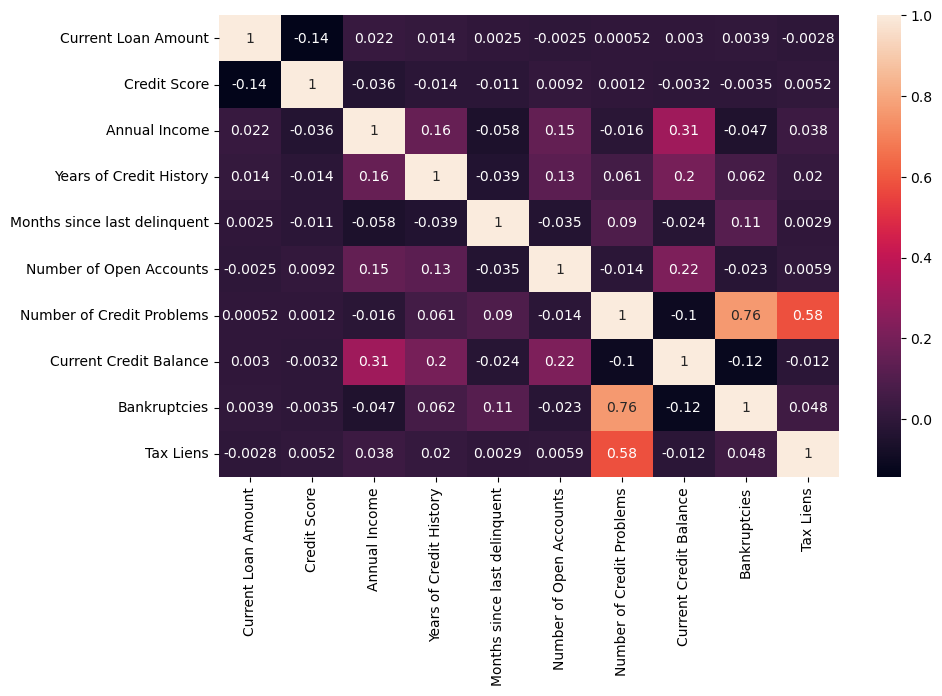

In [11]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True);

##### Credit scores

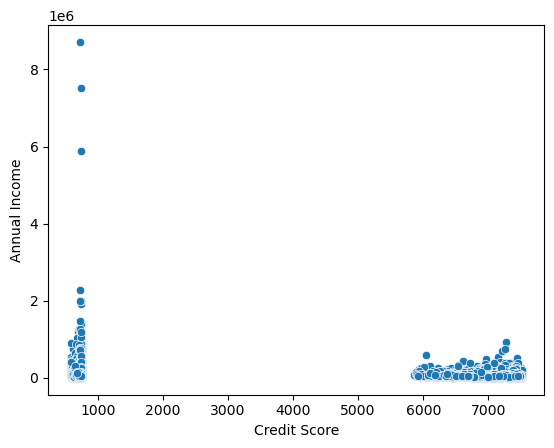

In [12]:
sns.scatterplot(x=df['Credit Score'], y=df['Annual Income'], palette='bright');

##### Home ownership

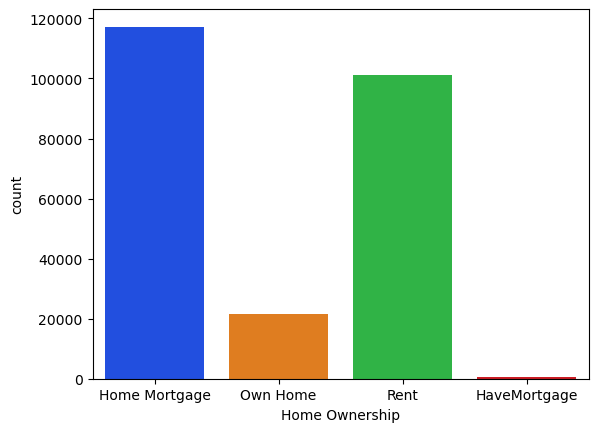

In [13]:
sns.countplot(x=df['Home Ownership'], palette='bright');

##### Loan Status

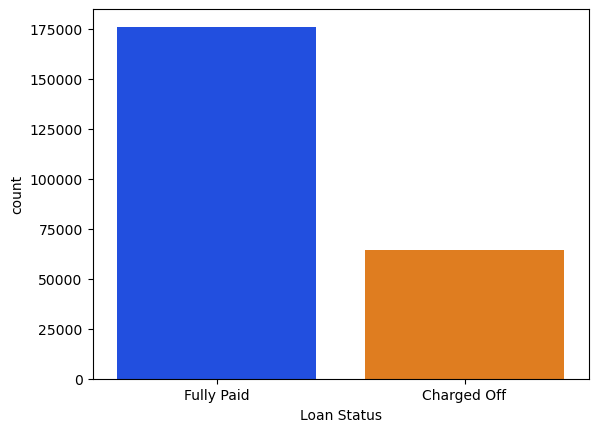

In [14]:
sns.countplot(x=df['Loan Status'], palette='bright');

##### Years in current job

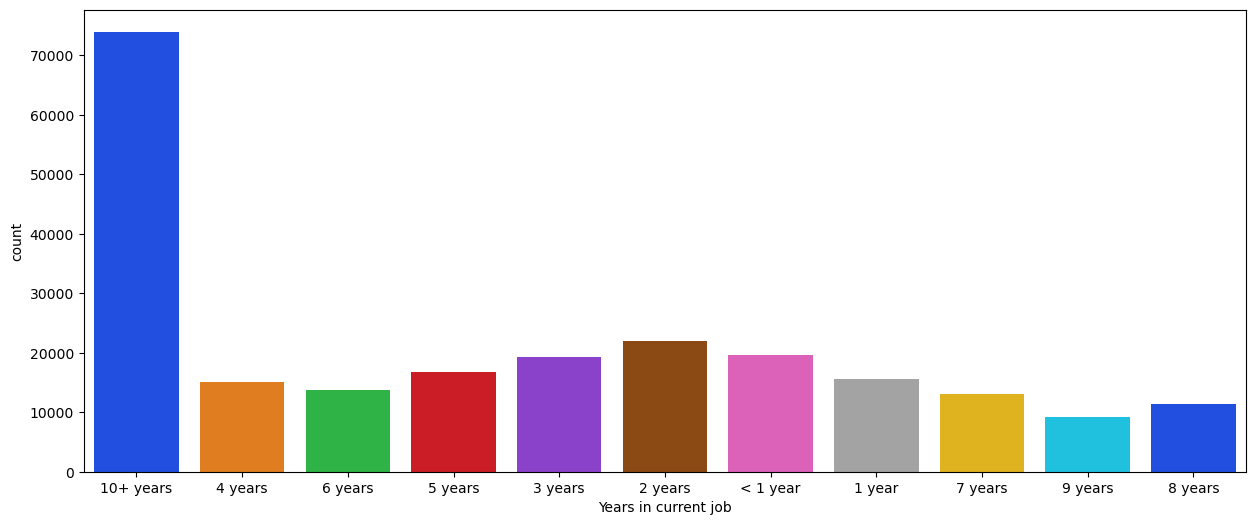

In [15]:
plt.figure(figsize=(15, 6))

sns.countplot(x=df['Years in current job'], palette='bright');

Most people have been employed in their current job for a long while.

##### Term

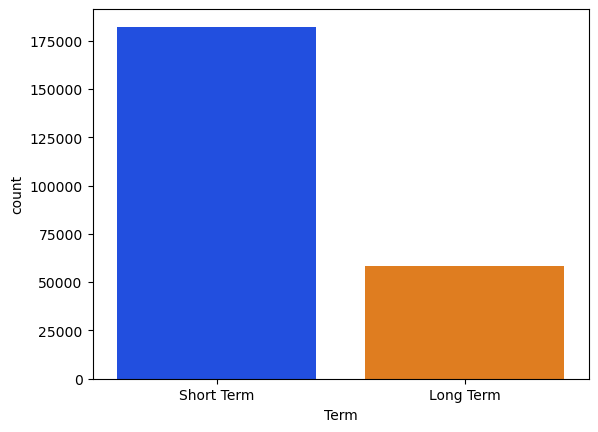

In [16]:
sns.countplot(x=df['Term'], palette='bright');

##### Purpose

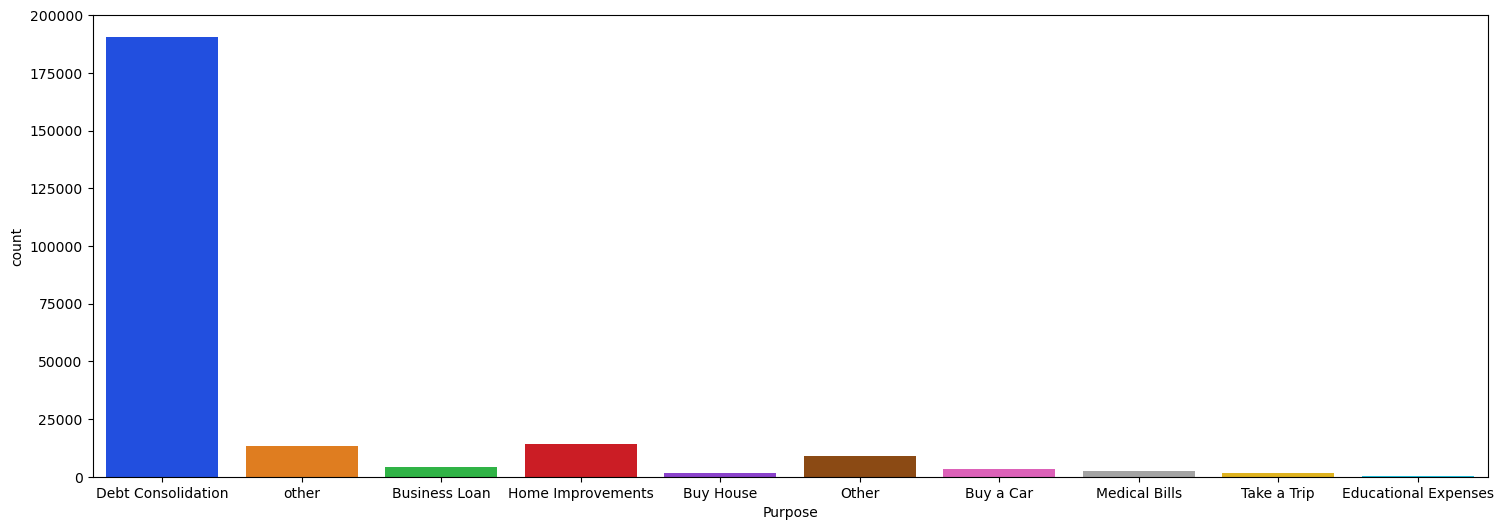

In [17]:
plt.figure(figsize=(18, 6))
sns.countplot(x=df['Purpose'], palette='bright');

Most people are applying for a loan to pay of another debt. Consider asking this before giving the loan.

### Data Cleaning

### Null values

In [18]:
def barplot_nulls(df, figsize=(15, 6), percentage=False, palette='bright'):
    """
        A function that draws a barplot that shows the count or the percentages of the empty values
        in a data frame. It does not show columns with no null values in the graph.
    """
    
    nulls = df.isnull().sum()
    title = f'Null value {"percentages" if percentage else "counts"} of columns with nonzero null values.'
    
    if percentage:
        nulls = (nulls / len(df)) * 100
    
    nulls = nulls[nulls > 0] # Filter the zeros.
    
    nulls_df = nulls.reset_index()
    nulls_df.columns = ['Column', 'Missing Values']
    
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.barplot(y=nulls_df['Missing Values'], x=nulls_df['Column'], palette=palette);

In [19]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     59346
Years in current job             10444
Home Ownership                       0
Annual Income                    59346
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    131427
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       492
Tax Liens                           23
dtype: int64

Shows the amount of null values in each column. Lets make a graphical representation with the above function.

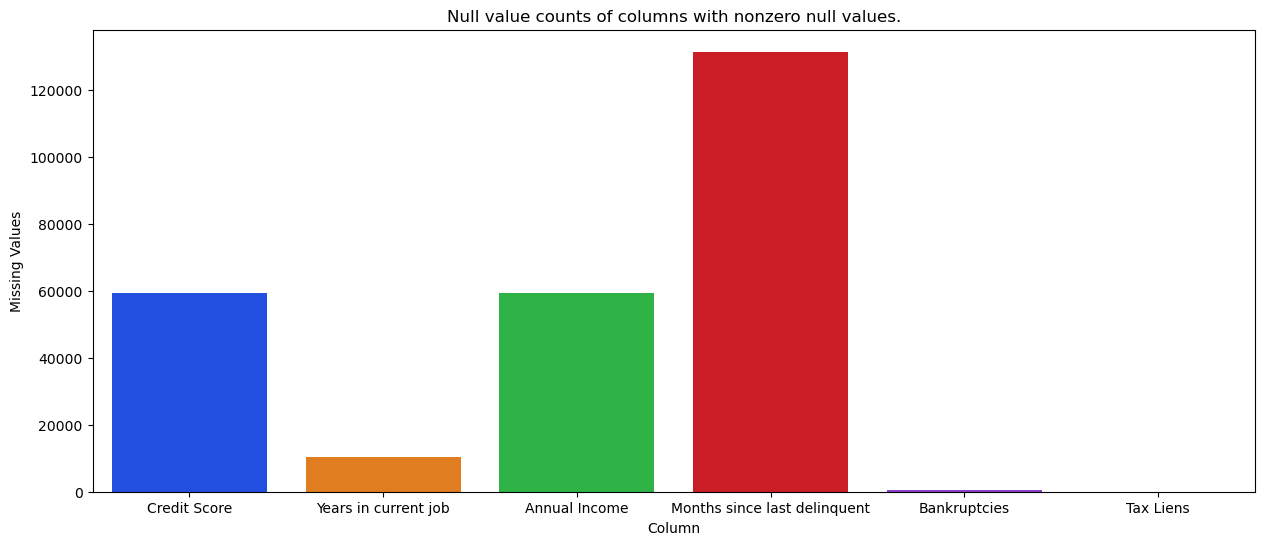

In [20]:
barplot_nulls(df)

In [21]:
(df.isnull().sum() / len(df)) * 100

Loan ID                          0.000000
Customer ID                      0.000000
Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                    24.689026
Years in current job             4.344896
Home Ownership                   0.000000
Annual Income                   24.689026
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.000000
Months since last delinquent    54.676046
Number of Open Accounts          0.000000
Number of Credit Problems        0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.000000
Bankruptcies                     0.204681
Tax Liens                        0.009568
dtype: float64

Shows the percentage of the null values. We will drop 'Months since last delinquent' since it has a lot of empty data.

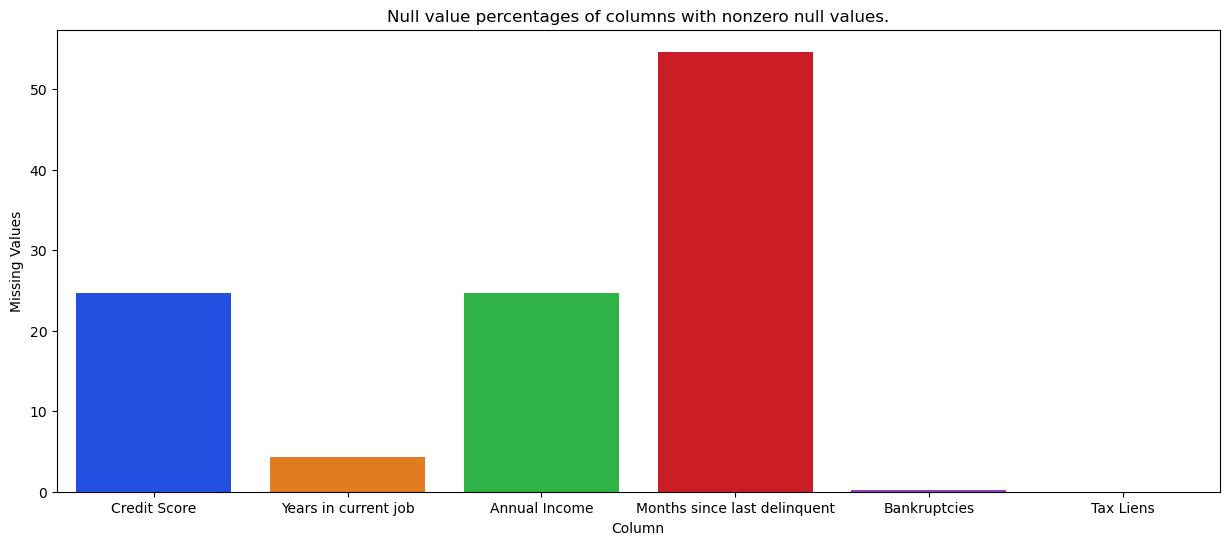

In [22]:
barplot_nulls(df, percentage=True)

In [23]:
del df['Months since last delinquent']

In [24]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,12,0,17391,37081,0.0,0.0


See that the 'Months since last delinquent' column is gone now.

#### Filling the null values

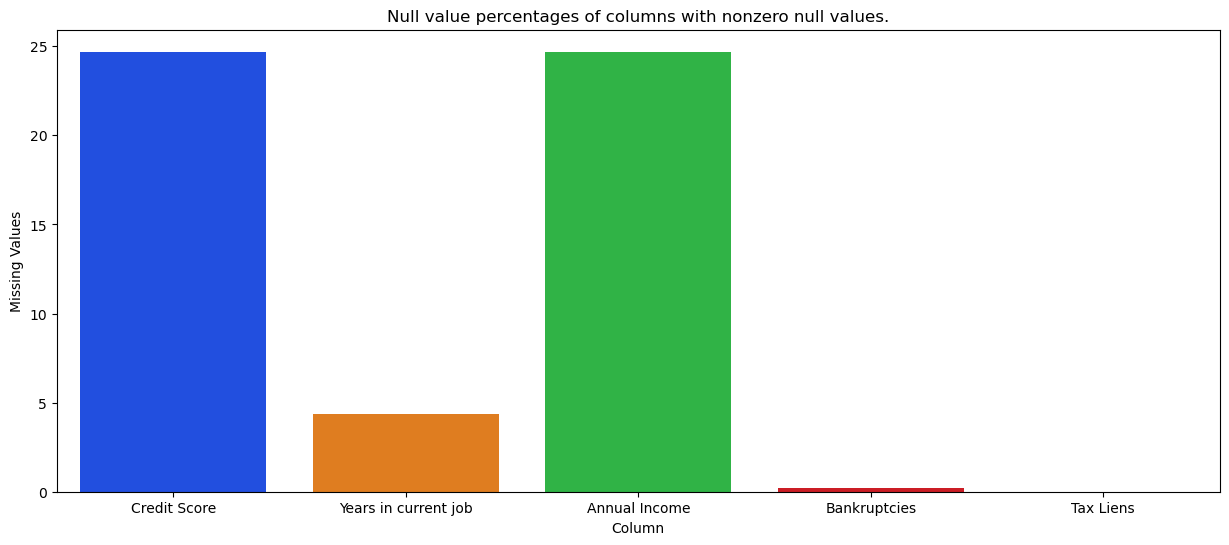

In [25]:
barplot_nulls(df, percentage=True)

Bankruptcies and Tax Liens have so few missing values.

##### Bankruptcies

In [26]:
df['Bankruptcies'].describe()

count    239882.000000
mean          0.110179
std           0.336176
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: Bankruptcies, dtype: float64

The standard deviation is very low. We can simply fill with the mean.

In [27]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mean())

##### Tax Liens

In [28]:
df['Tax Liens'].describe()

count    240351.000000
mean          0.026952
std           0.244272
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: Tax Liens, dtype: float64

The standard deviation is low here as well. We can use the mean to fill empty values.

In [29]:
df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].mean())

##### Years in current job

In [30]:
df['Years in current job'].describe()

count        229930
unique           11
top       10+ years
freq          73965
Name: Years in current job, dtype: object

In [31]:
df['Years in current job'].mode()

0    10+ years
Name: Years in current job, dtype: object

Since this column consists of categorical values, we cannot simply fill it with the mean value. We can see from above graph that '10+ years' is the overwhelming majority, and given the null values are less than 5% it is safe to use that to fill.

In [32]:
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].value_counts().idxmax())

##### Checking the graph again

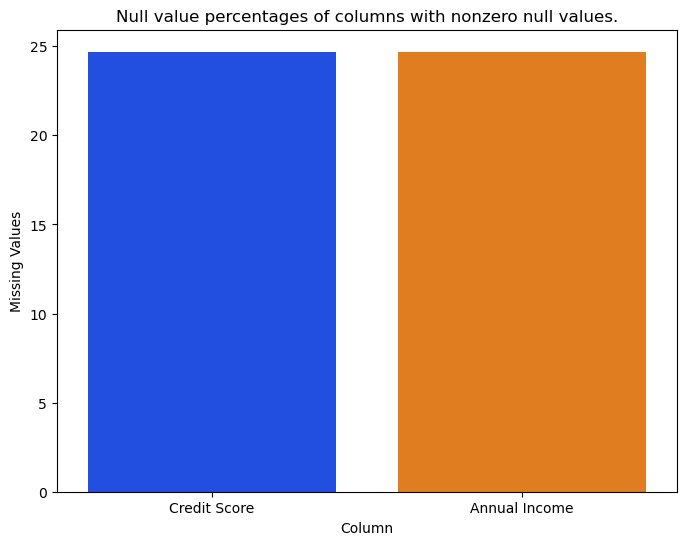

In [33]:
barplot_nulls(df, percentage=True, figsize=(8, 6))

##### Credit Score

In [34]:
df['Credit Score'].describe()

count    181028.000000
mean       1236.274079
std        1737.765627
min         585.000000
25%         715.000000
50%         734.000000
75%         744.000000
max        7510.000000
Name: Credit Score, dtype: float64

###### Check for outliers using a boxplot

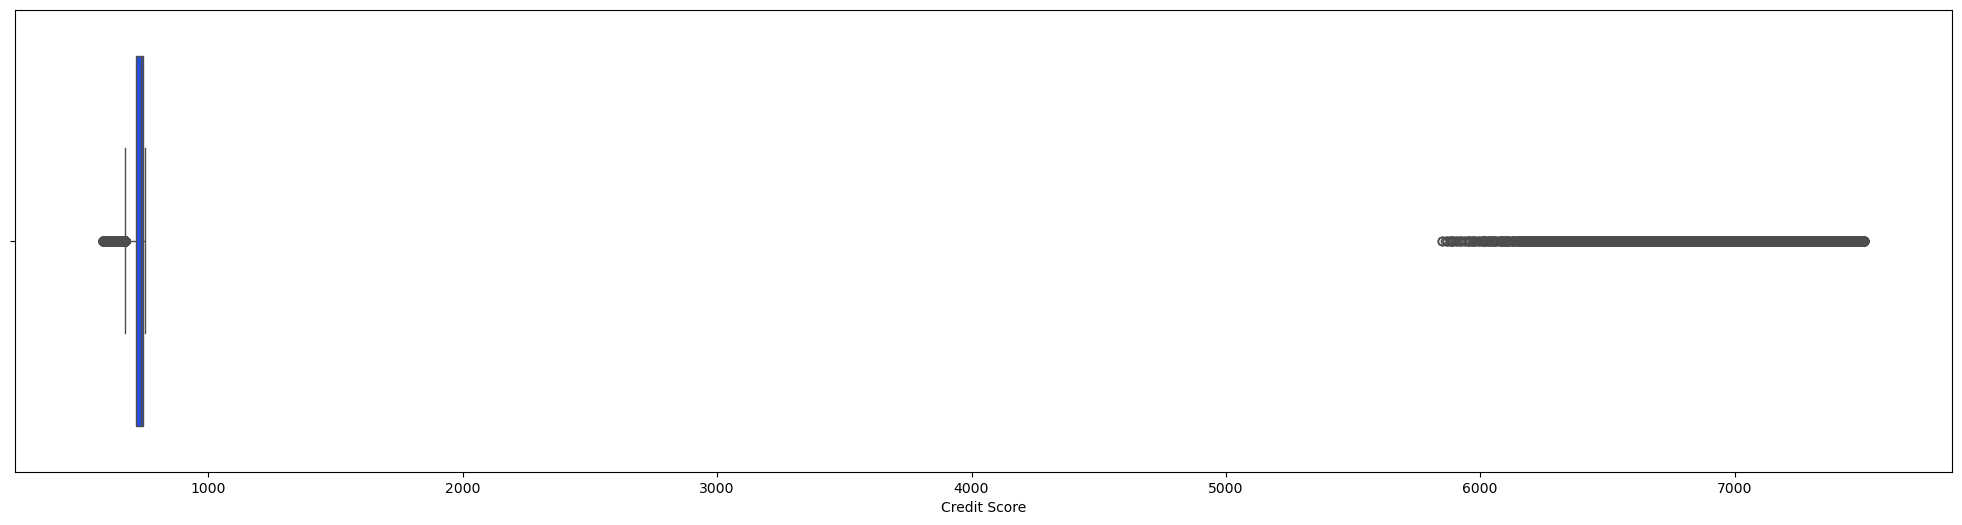

In [35]:
plt.figure(figsize=(25, 6))
sns.boxplot(x=df['Credit Score'], palette='bright');

The data has many outliers. We cannot use the mean to fill it.

In [36]:
df['Credit Score'].interpolate(method='linear', inplace=True)

##### Annual Income

In [37]:
df['Annual Income'].describe()

count    1.810280e+05
mean     7.240027e+04
std      5.646808e+04
min      0.000000e+00
25%      4.455500e+04
50%      6.150500e+04
75%      8.705700e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

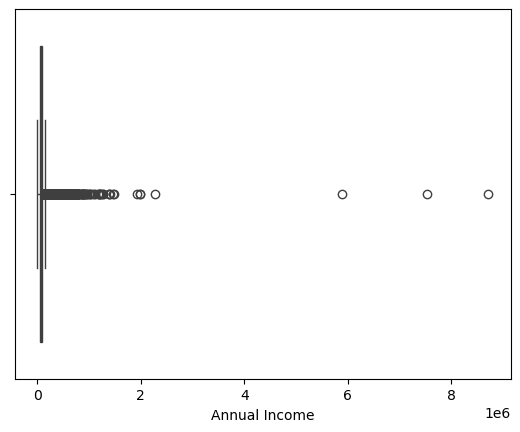

In [38]:
sns.boxplot(x=df['Annual Income']);

Once again the data has many outliers.

In [39]:
df['Annual Income'].interpolate(method='linear', inplace=True)

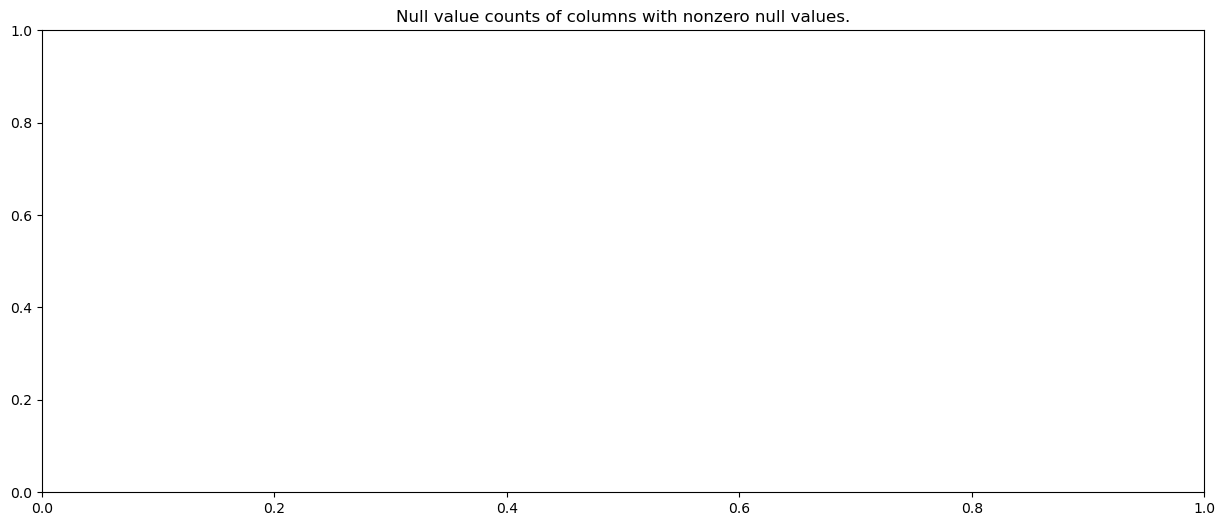

In [40]:
barplot_nulls(df)

No null values!

### Transforming categorical data into numeric

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240374 entries, 0 to 256983
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    240374 non-null  object 
 1   Customer ID                240374 non-null  object 
 2   Loan Status                240374 non-null  object 
 3   Current Loan Amount        240374 non-null  int64  
 4   Term                       240374 non-null  object 
 5   Credit Score               240374 non-null  float64
 6   Years in current job       240374 non-null  object 
 7   Home Ownership             240374 non-null  object 
 8   Annual Income              240374 non-null  float64
 9   Purpose                    240374 non-null  object 
 10  Monthly Debt               240374 non-null  object 
 11  Years of Credit History    240374 non-null  float64
 12  Number of Open Accounts    240374 non-null  int64  
 13  Number of Credit Problems  240374 

#### Years in current job

In [42]:
df['Years in current job'].unique()

array(['10+ years', '4 years', '6 years', '5 years', '3 years', '2 years',
       '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [43]:
new_data = {
    '10+ years': 10.0,
    '4 years': 4.0,
    '6 years': 6.0,
    '5 years': 5.0,
    '3 years': 3.0,
    '2 years': 2.0,
    '< 1 year': 0.5,
    '1 year': 1.0,
    '7 years': 7.0,
    '9 years': 9.0,
    '8 years': 8.0
}

In [44]:
df['Years in current job'] = df['Years in current job'].map(new_data)

In [45]:
df['Years in current job'].describe()

count    240374.000000
mean          6.090609
std           3.580018
min           0.500000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: Years in current job, dtype: float64

#### Loan status

In [46]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [47]:
new_data = {
    'Fully Paid': 1,
    'Charged Off': 0
}

In [48]:
df['Loan Status'] = df['Loan Status'].map(new_data)

In [49]:
df['Loan Status'].describe()

count    240374.000000
mean          0.732987
std           0.442400
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Loan Status, dtype: float64

#### Term

In [50]:
df['Term'].sample(5)

230724    Short Term
75017     Short Term
62089     Short Term
112281    Short Term
203569    Short Term
Name: Term, dtype: object

In [51]:
df['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

The term is not a hierarchial data, so instead of assigning short term 0 and long term 1, we will do get_dummies().

#### Purpose

In [54]:
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

There are two kinds of 'Other' in this data. We must fix this.

In [55]:
df.loc[df['Purpose'] == 'other', 'Purpose'] = 'Other'

In [58]:
df['Purpose'].unique()

array(['Debt Consolidation', 'Other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Buy a Car', 'Medical Bills',
       'Take a Trip', 'Educational Expenses'], dtype=object)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240374 entries, 0 to 256983
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    240374 non-null  object 
 1   Customer ID                240374 non-null  object 
 2   Loan Status                240374 non-null  int64  
 3   Current Loan Amount        240374 non-null  int64  
 4   Term                       240374 non-null  object 
 5   Credit Score               240374 non-null  float64
 6   Years in current job       240374 non-null  float64
 7   Home Ownership             240374 non-null  object 
 8   Annual Income              240374 non-null  float64
 9   Purpose                    240374 non-null  object 
 10  Monthly Debt               240374 non-null  object 
 11  Years of Credit History    240374 non-null  float64
 12  Number of Open Accounts    240374 non-null  int64  
 13  Number of Credit Problems  240374 

#### Home Ownership

In [61]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)